In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("DataSet/housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split
# x is data frame without target variable
x = data.drop(['median_house_value'], axis = 1)
# y is target variable
y = data['median_house_value']


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
train_data = x_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19292,-122.84,38.41,19.0,2191.0,391.0,1065.0,404.0,4.1250,<1H OCEAN,204600.0
16327,-121.34,37.98,8.0,2628.0,428.0,1158.0,393.0,5.3002,INLAND,191700.0
18041,-121.98,37.22,46.0,10088.0,1910.0,3728.0,1781.0,5.2321,<1H OCEAN,500001.0
19926,-119.33,36.32,23.0,3137.0,628.0,1446.0,548.0,2.5000,INLAND,85500.0
12393,-116.42,33.68,15.0,3895.0,782.0,900.0,529.0,2.2208,INLAND,138300.0
...,...,...,...,...,...,...,...,...,...,...
4340,-118.29,34.08,23.0,1864.0,937.0,2795.0,858.0,1.8495,<1H OCEAN,212500.0
15224,-117.26,33.05,14.0,2323.0,373.0,1057.0,372.0,6.2513,NEAR OCEAN,240900.0
9299,-122.59,38.04,25.0,3412.0,455.0,1238.0,406.0,8.3646,NEAR BAY,397300.0
6865,-118.12,34.06,35.0,1729.0,438.0,1308.0,412.0,2.5321,<1H OCEAN,197200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

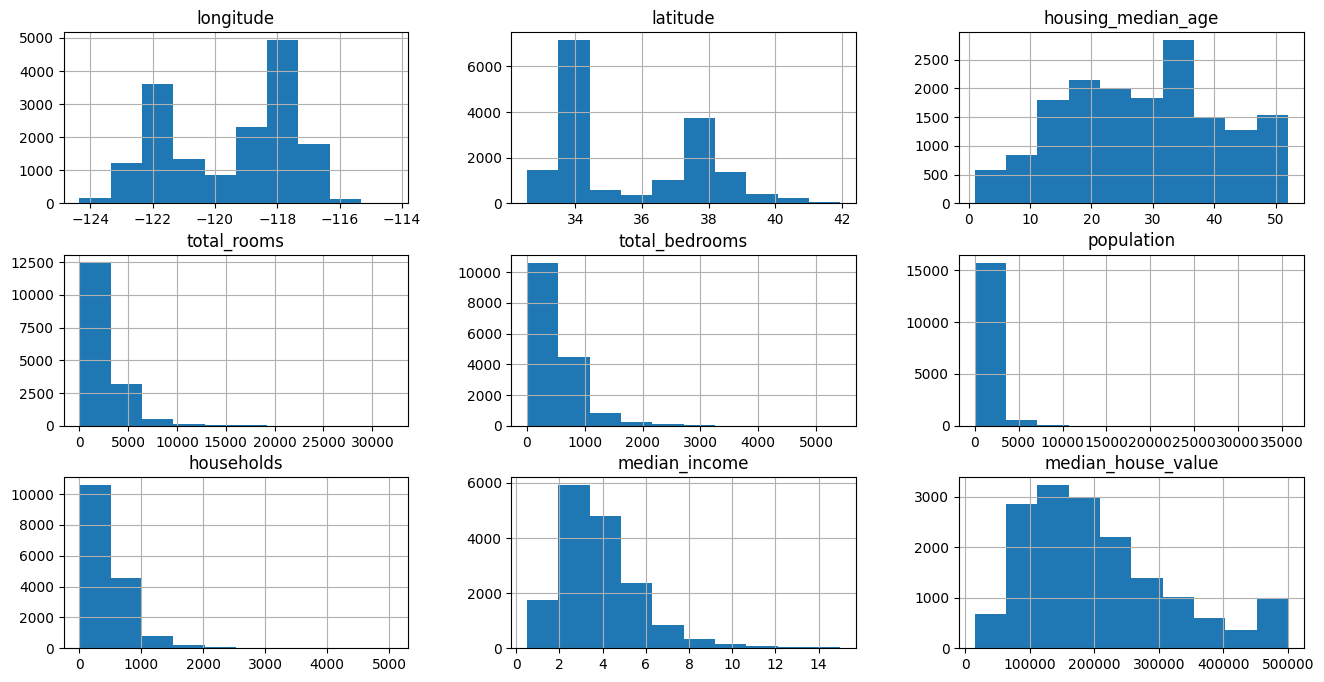

In [12]:
train_data.hist(figsize=(16,8))

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19292,-122.84,38.41,19.0,2191.0,391.0,1065.0,404.0,4.1250,<1H OCEAN,204600.0
16327,-121.34,37.98,8.0,2628.0,428.0,1158.0,393.0,5.3002,INLAND,191700.0
18041,-121.98,37.22,46.0,10088.0,1910.0,3728.0,1781.0,5.2321,<1H OCEAN,500001.0
19926,-119.33,36.32,23.0,3137.0,628.0,1446.0,548.0,2.5000,INLAND,85500.0
12393,-116.42,33.68,15.0,3895.0,782.0,900.0,529.0,2.2208,INLAND,138300.0
...,...,...,...,...,...,...,...,...,...,...
4340,-118.29,34.08,23.0,1864.0,937.0,2795.0,858.0,1.8495,<1H OCEAN,212500.0
15224,-117.26,33.05,14.0,2323.0,373.0,1057.0,372.0,6.2513,NEAR OCEAN,240900.0
9299,-122.59,38.04,25.0,3412.0,455.0,1238.0,406.0,8.3646,NEAR BAY,397300.0
6865,-118.12,34.06,35.0,1729.0,438.0,1308.0,412.0,2.5321,<1H OCEAN,197200.0


In [14]:
train_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925488,-0.108952,0.043600,0.068343,0.098252,0.054990,-0.013910,-0.041496
latitude,-0.925488,1.000000,0.012960,-0.034801,-0.065536,-0.108021,-0.070460,-0.080165,-0.146954
housing_median_age,-0.108952,0.012960,1.000000,-0.364006,-0.322185,-0.296934,-0.304473,-0.125059,0.101373
total_rooms,0.043600,-0.034801,-0.364006,1.000000,0.929318,0.853434,0.917836,0.199659,0.135915
total_bedrooms,0.068343,-0.065536,-0.322185,0.929318,1.000000,0.875068,0.979202,-0.009343,0.049680
population,0.098252,-0.108021,-0.296934,0.853434,0.875068,1.000000,0.905215,0.003304,-0.024669
households,0.054990,-0.070460,-0.304473,0.917836,0.979202,0.905215,1.000000,0.011545,0.064694
median_income,-0.013910,-0.080165,-0.125059,0.199659,-0.009343,0.003304,0.011545,1.000000,0.688839
median_house_value,-0.041496,-0.146954,0.101373,0.135915,0.049680,-0.024669,0.064694,0.688839,1.000000


<Axes: >

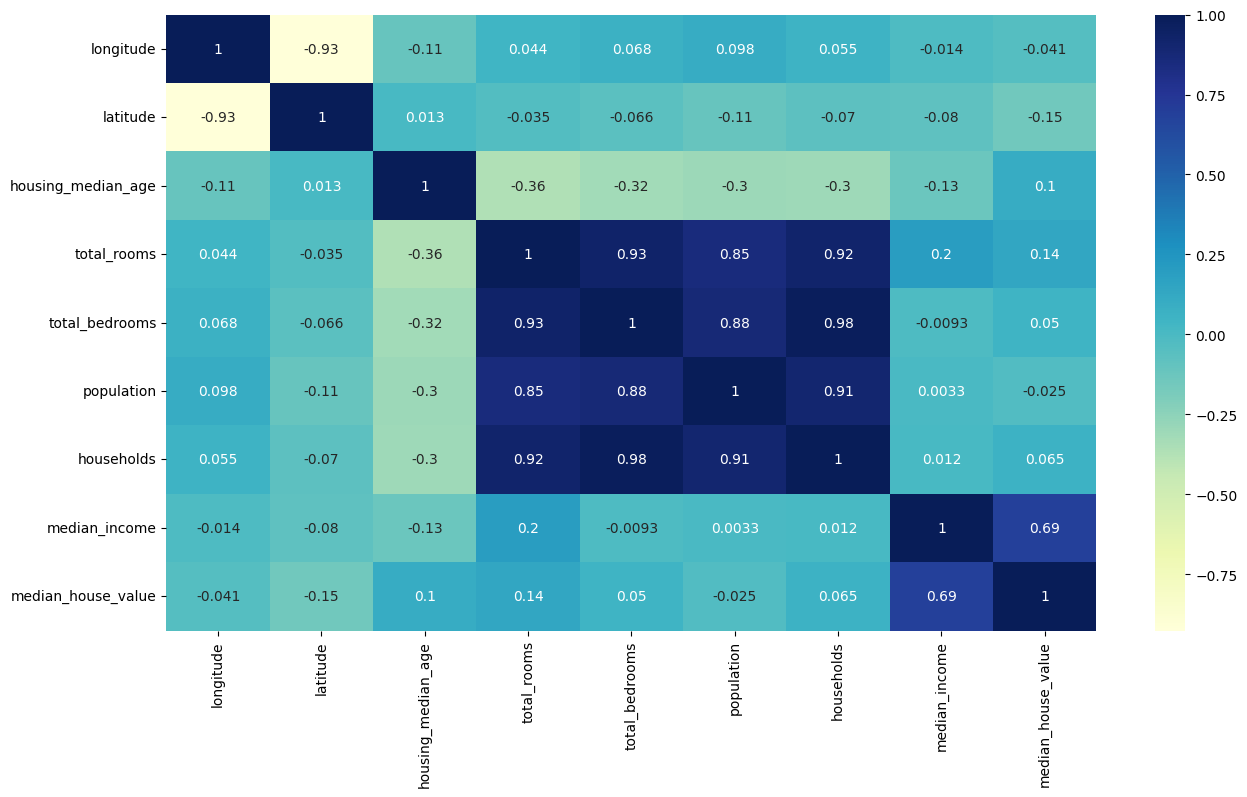

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap= "YlGnBu")

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

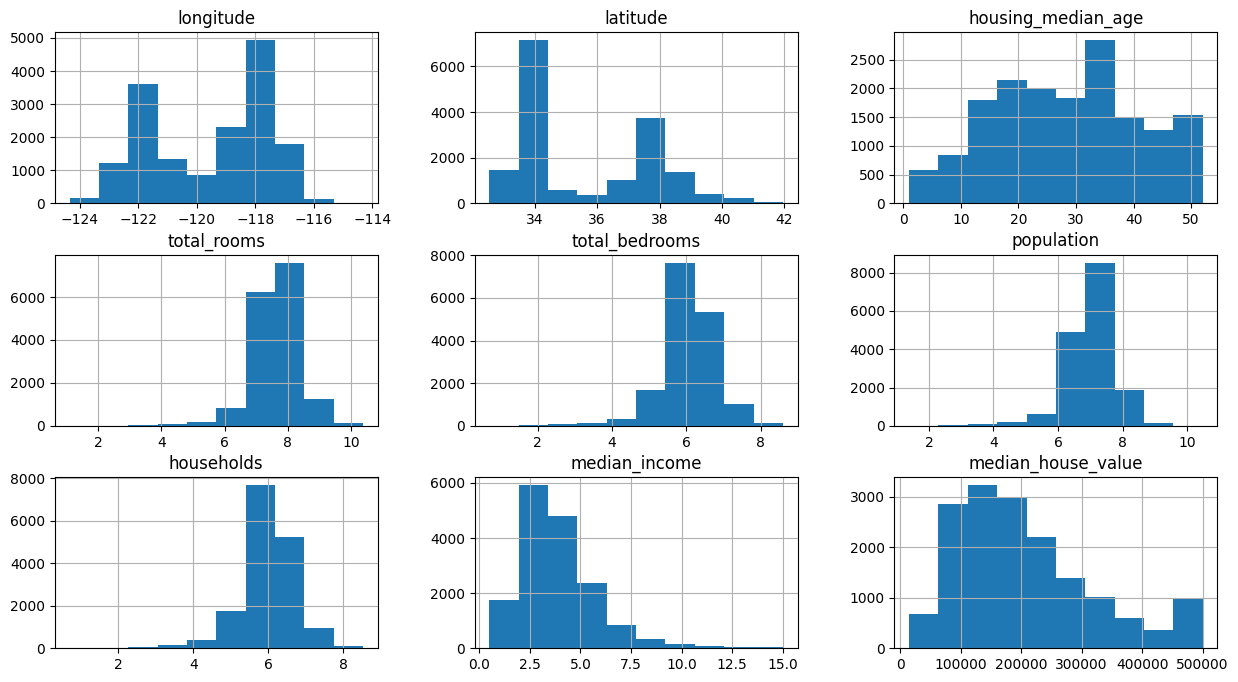

In [17]:
train_data.hist(figsize=(15,8))

In [18]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7238
INLAND        5149
NEAR OCEAN    2130
NEAR BAY      1825
ISLAND           4
Name: count, dtype: int64

In [19]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19292,-122.84,38.41,19.0,7.692570,5.971262,6.971669,6.003887,4.1250,204600.0,1,0,0,0,0
16327,-121.34,37.98,8.0,7.874359,6.061457,7.055313,5.976351,5.3002,191700.0,0,1,0,0,0
18041,-121.98,37.22,46.0,9.219201,7.555382,8.223895,7.485492,5.2321,500001.0,1,0,0,0,0
19926,-119.33,36.32,23.0,8.051341,6.444131,7.277248,6.308098,2.5000,85500.0,0,1,0,0,0
12393,-116.42,33.68,15.0,8.267706,6.663133,6.803505,6.272877,2.2208,138300.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,-118.29,34.08,23.0,7.531016,6.843750,7.935945,6.755769,1.8495,212500.0,1,0,0,0,0
15224,-117.26,33.05,14.0,7.751045,5.924256,6.964136,5.921578,6.2513,240900.0,0,0,0,0,1
9299,-122.59,38.04,25.0,8.135347,6.122493,7.122060,6.008813,8.3646,397300.0,0,0,0,1,0
6865,-118.12,34.06,35.0,7.455877,6.084499,7.177019,6.023448,2.5321,197200.0,1,0,0,0,0


<Axes: >

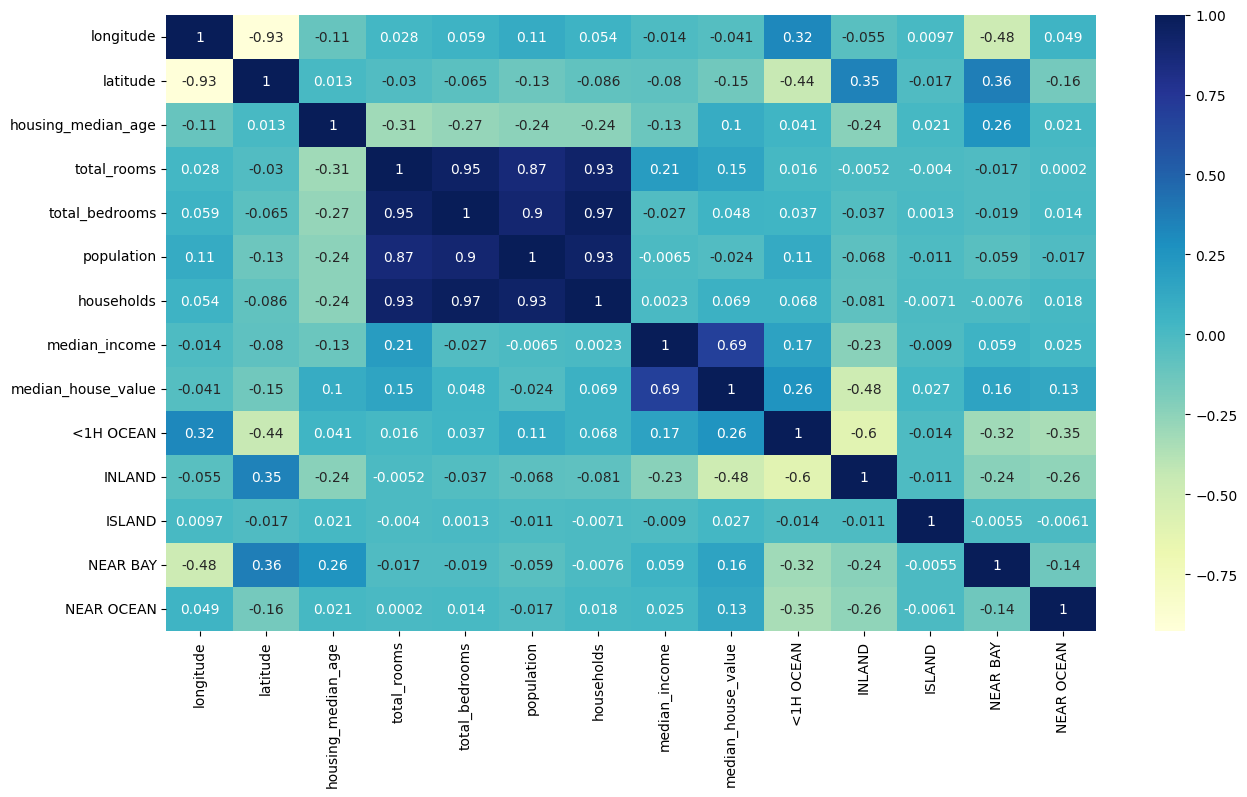

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap= "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

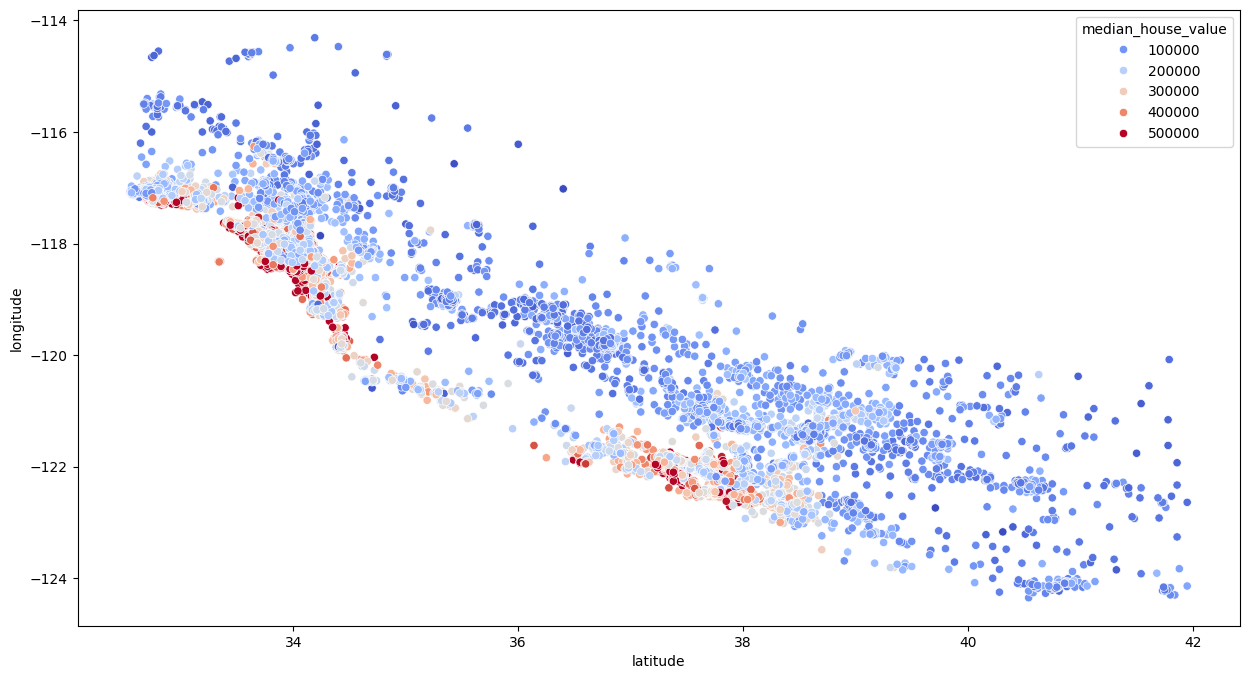

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y= "longitude", data= train_data, hue= "median_house_value", palette= "coolwarm")

In [24]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

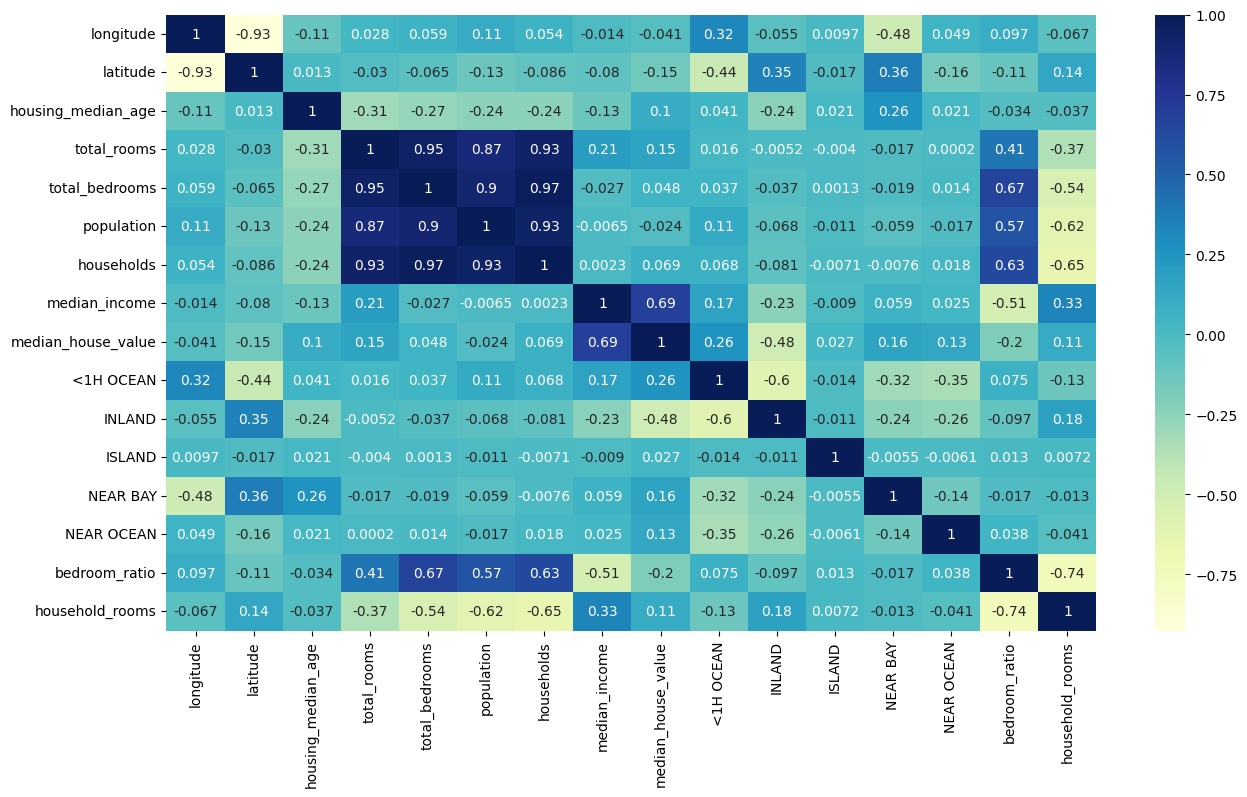

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap= "YlGnBu")